# 问题

动量空间中电势为

\begin{align}
\varphi (\vec{q})= \frac{\varphi_{ext(\vec{q})}}{\varepsilon(\vec{q})}
\end{align}

其中

\begin{align}
\varphi_{ext}(\vec{q}) = \frac{-e}{\varepsilon_0 V q^2 }
\end{align}

所以

\begin{equation}
\label{eq:1}
\varphi (\vec{q})= \frac{-e}{\varepsilon_0 V q^2 {\varepsilon(\vec{q})}}
\end{equation}

## Thomas-Fermi 近似的结果

Thomas-Fermi 近似给出

\begin{align}
\varepsilon_{TF}(\vec{q}) = 1 +\frac{q_{TF}^2}{q^2}
\end{align}

将上式代入 $\varphi(\vec{q})$ 有

\begin{equation}
\varphi (\vec{q})= \frac{-e}{\varepsilon_0 V q^2 \left(1 +\frac{q_{TF}^2}{q^2}\right)} 
=\frac{-e}{\varepsilon_0 V \left(q^2 +q_{TF}^2\right)} 
\end{equation}

对其 Fourier Transform

\begin{align}
\varphi(\vec{r}) =& \int_{-\infty}^{+\infty} e^{i \vec{q}\cdot \vec{r}} \varphi (\vec{q}) \mathrm{d}^3 q \\
=& \frac{-e}{2 \pi^2 \varepsilon_0} \cdot \frac{1}{r} \int_0^{+\infty} \sin(qr)\cdot \frac{q}{q^2+q_{TF}^2} \mathrm{d}q\\
=& \frac{-e}{4 \pi \varepsilon_0} \cdot \frac{1}{r} \cdot \frac{\pi}{2}\int_0^{+\infty} \sin(qr)\cdot \frac{q}{q^2+q_{TF}^2} \mathrm{d}q
\end{align}

对
\begin{align}
\frac{q}{q^2+q_{TF}^2}
\end{align}
在 $q \rightarrow +\infty$ 展开(与在 $q_{TF}\rightarrow 0$ 时对 $q_{TF}$ 展开相同):

In [61]:
import sympy as sym
q = sym.Symbol('q')
q_tf = sym.Symbol('q_TF')
s = sym.series(q/(q**2+q_tf**2),q,sym.oo,5)
print(sym.latex(s))

- \frac{q_{TF}^{2}}{q^{3}} + \frac{1}{q} + O\left(\frac{1}{q^{5}}; q\rightarrow \infty\right)


\begin{align}
\frac{q}{q^2+q_{TF}^2}  =\frac{q_{TF}^{2}}{q^{3}} + \frac{1}{q} + O\left(\frac{1}{q^{5}}; q\rightarrow \infty\right)
\end{align}

计算 leading order

\begin{align}
 \int_0^{+\infty} \sin(qr)\cdot \frac{1}{q}\mathrm{d}q = \frac{1}{2i} \int_{-\infty}^{+\infty} e^{iqr}\cdot \frac{1}{q} \mathrm{d}
q = \frac{1}{2i} \cdot \pi i \cdot 1 = \frac{\pi}{2}
\end{align}

这正好是精确结果 
\begin{align}
\frac{-e}{4 \pi \varepsilon_0} \cdot \frac{e^{-q_{TF} r}}{r}
\end{align}
在 $q_{TF}\rightarrow 0$ 时对 $q_{TF}$ 展开的结果的 leading order 相同.

<font color=red>问题1:</font> Thomas-Fermi 近似结果与精确结果的 $q_{TF}^2$ 的系数不同? 

<font color=red>问题2:</font> 为什么要对 $q$ 在 $q\rightarrow +\infty$ 展开? 积分的区间不是整个实轴吗?

## RPA 的结果

RPA 给出

\begin{align}
\varepsilon (\vec{q}) = 1+ \frac{q_{TF}^2}{q^2}g\left( \frac{q}{2k_F} \right)
\end{align}

将上式代入  𝜑(𝑞⃗ )  有

\begin{equation}
\varphi (\vec{q})= \frac{-e}{\varepsilon_0 V q^2 \left(1 +\frac{q_{TF}^2}{q^2}\right)} 
=\frac{-e}{\varepsilon_0 V \left(q^2 +q_{TF}^2 g\left( \frac{q}{2k_F} \right) \right)} 
\end{equation}

其中

\begin{align}
g(u) = \frac{1}{2} \left( 1+\frac{1}{2u}(1-u^2)\ln \left| \frac{1+u}{1-u} \right| \right)
\end{align}

对 𝜑(𝑞⃗ ) 作 Fourier Transform  

\begin{align}
\varphi(\vec{r}) =\frac{-e}{2 \pi^2 \varepsilon_0} \cdot \frac{1}{r} \int_0^{+\infty}  \sin(qr)\cdot \frac{q}{q^2+q_{TF}^2g( \frac{q}{2k_F} )} \mathrm{d}q
\end{align}

### 级数展开

对 
\begin{align}
\frac{q}{q^2+q_{TF}^2g( \frac{q}{2k_F} )}
\end{align} 
在 $q\rightarrow +\infty$ 展开

In [6]:
import sympy as sym
q = sym.Symbol('q')
q_tf = sym.Symbol('q_TF')
kf = sym.Symbol('k_F')
u = q/(2*kf)
g = sym.Rational(1,2)*( 1+(1-u**2)/(2*u)*sym.log(sym.Abs((u+1)/(u-1)) ) )
s = sym.series(q/(q**2+q_tf**2*g),q,sym.oo,10)
print(sym.latex(s))
print(s)


\frac{1}{q} - \frac{4 k_{F}^{2} q_{TF}^{2}}{3 q^{5}} - \frac{16 k_{F}^{4} q_{TF}^{2}}{15 q^{7}} - \frac{64 k_{F}^{6} q_{TF}^{2}}{35 q^{9}} + O\left(\frac{1}{q^{10}}; q\rightarrow \infty\right)
1/q - 4*k_F**2*q_TF**2/(3*q**5) - 16*k_F**4*q_TF**2/(15*q**7) - 64*k_F**6*q_TF**2/(35*q**9) + O(q**(-10), (q, oo))


$$
\frac{1}{q} - \frac{4 k_{F}^{2} q_{TF}^{2}}{3 q^{5}} - \frac{16 k_{F}^{4} q_{TF}^{2}}{15 q^{7}} - \frac{64 k_{F}^{6} q_{TF}^{2}}{35 q^{9}} + O\left(\frac{1}{q^{10}}; q\rightarrow \infty\right)
$$

\begin{align}
\frac{q}{q^2+q_{TF}^2g( \frac{q}{2k_F} )} = \frac{\frac{256 k_{F}^{8}}{63} - \frac{64 k_{F}^{6} q_{TF}^{2}}{35} + \frac{16 k_{F}^{4} q_{TF}^{4}}{15}}{q^{9}} + \frac{\frac{64 k_{F}^{6}}{35} - \frac{16 k_{F}^{4} q_{TF}^{2}}{15} + \frac{4 k_{F}^{2} q_{TF}^{4}}{3}}{q^{7}} + \frac{\frac{16 k_{F}^{4}}{15} - \frac{4 k_{F}^{2} q_{TF}^{2}}{3}}{q^{5}} + \frac{4 k_{F}^{2}}{3 q^{3}} + O\left(\frac{1}{q^{10}}; q\rightarrow \infty\right)
\end{align}

<font color=red>问题3:</font> 接下来该怎么做? 所有的展开项代入积分都是发散的.

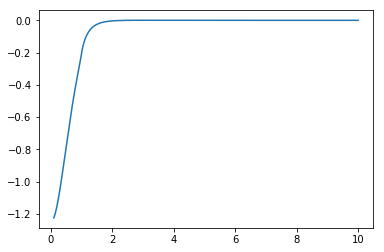

In [27]:
import numpy as np
from matplotlib import pyplot as plt
q = np.linspace(0.1,10,1000)

r = 5/4
q_tf = 3/4
kf = 1/2
u = q/(2*kf)
g = (1/2)*( 1+(1-u**2)/(2*u)*np.log(np.abs((u+1)/(u-1)) ) )

phi = np.sin(q*r)*q/(q**2+q_tf**2*g)
F = phi - np.sin(q*r)/q
#plt.plot(q,phi)
plt.plot(q,F)
plt.show()

# 参考文献


Friedel Oscillation 的原始文献 the shielding of a fixed charge in a high-density electron gas http://www.doc88.com/p-9512851691956.html 